In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install colorama


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import colorama
from colorama import Fore, Back, Style


#ignoring warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

In [ ]:
prod_data = pd.read_csv('/content/drive/MyDrive/kaggle/input/bigbasket-entire-product-list-28k-datapoints/BigBasket Products.csv (1)/BigBasket Products.csv')

# New Section

In [ ]:
print(Back.YELLOW+ Style.BRIGHT+'Bigbasket Data:'+ Style.RESET_ALL)
prod_data

Bigbasket Data:


,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."


In [ ]:
prod_data["discount"] = (prod_data["market_price"] - prod_data["sale_price"]) / prod_data["market_price"] * 100
prod_data["discount"]

0         0.000000
1         0.000000
2        52.400000
3        15.340909
4         0.000000
           ...    
27550    20.000000
27551    10.000000
27552     0.000000
27553    20.000000
27554    44.992308
Name: discount, Length: 27555, dtype: float64

In [ ]:
prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
 10  discount      27555 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 2.3+ MB


In [ ]:
prod_data.isnull().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
discount           0
dtype: int64

In [ ]:
#percentage of num values

print('Percentage Null Data In Each Column')
print('-'*30)
for col in prod_data.columns:
    null_count = prod_data[col].isnull().sum()
    total_count = prod_data.shape[0]
    print("{} : {:.2f}".format(col,null_count/total_count * 100))

Percentage Null Data In Each Column
------------------------------
index : 0.00
product : 0.00
category : 0.00
sub_category : 0.00
brand : 0.00
sale_price : 0.00
market_price : 0.00
type : 0.00
rating : 31.30
description : 0.42
discount : 0.00


In [ ]:
#total NULL data
print('Total Null Data')
null_count = prod_data.isnull().sum().sum()
total_count = np.product(prod_data.shape)
print("{:.2f}".format(null_count/total_count * 100))

Total Null Data
2.88


In [ ]:
prod_data = prod_data.dropna()
prod_data.isnull().sum()

index           0
product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
discount        0
dtype: int64

In [ ]:
prod_data.shape

(18840, 11)

In [ ]:
print(Back.YELLOW+ Style.BRIGHT+ 'Summary of Product Catalogue:' + Style.RESET_ALL)
print('Total number of unique ' + Fore.RED+ Style.BRIGHT+ 'Products' + Style.RESET_ALL+'      :',\
      Fore.RED+ Style.BRIGHT+ str(len(prod_data['product'].unique())) + Style.RESET_ALL)

print('Total number of ' + Fore.RED+ Style.BRIGHT+ 'Product Categories' + Style.RESET_ALL +'   :',\
      Fore.RED+ Style.BRIGHT+ str(len(prod_data['category'].unique())) + Style.RESET_ALL)

print('Total number of ' + Fore.RED+ Style.BRIGHT+ 'Sub-Categories' + Style.RESET_ALL +'       :',\
      Fore.RED+ Style.BRIGHT+ str(len(prod_data['sub_category'].unique())) + Style.RESET_ALL)

print('Total number of ' + Fore.RED+ Style.BRIGHT+ 'Product Types' + Style.RESET_ALL +'        :',\
      Fore.RED+ Style.BRIGHT+ str(len(prod_data['type'].unique())) + Style.RESET_ALL)

print('Total number of ' + Fore.RED+ Style.BRIGHT+ 'Brands' + Style.RESET_ALL +'               :',\
      Fore.RED+ Style.BRIGHT+ str(len(prod_data['brand'].unique())) + Style.RESET_ALL)

Summary of Product Catalogue:
Total number of unique Products      : 16217
Total number of Product Categories   : 9
Total number of Sub-Categories       : 77
Total number of Product Types        : 358
Total number of Brands               : 1933


ANALYSIS OF CATEGORICAL FEATURES:

Products, category, sub-category and product typ

In [ ]:
#Count of Products under each Category
ctg_prod=prod_data[['category', 'product']]
ctg_prod=ctg_prod.drop_duplicates()
ctg_prod=ctg_prod.groupby('category').agg(prod_count=('product','count')).reset_index().sort_values('prod_count', ascending=False)

# ctg_prod


fig = go.Figure(data=px.bar(x=ctg_prod.category,
                            y=ctg_prod.prod_count,
                            color = ctg_prod.category,
                            color_discrete_sequence=px.colors.sequential.Viridis  ,
                            title='<b>Count of Products under each Category</b>',
                            text = ctg_prod.prod_count,
                            height=500))
fig.update_layout(
    font_family="Times New Roman",
    title_font_family="Courier New",
    title_font_color="green",
    title_font_size=20,
    xaxis_title="<b>Category</b>",
    yaxis_title="<b>No. of Products</b>",
    legend_title_font_color="green"
)

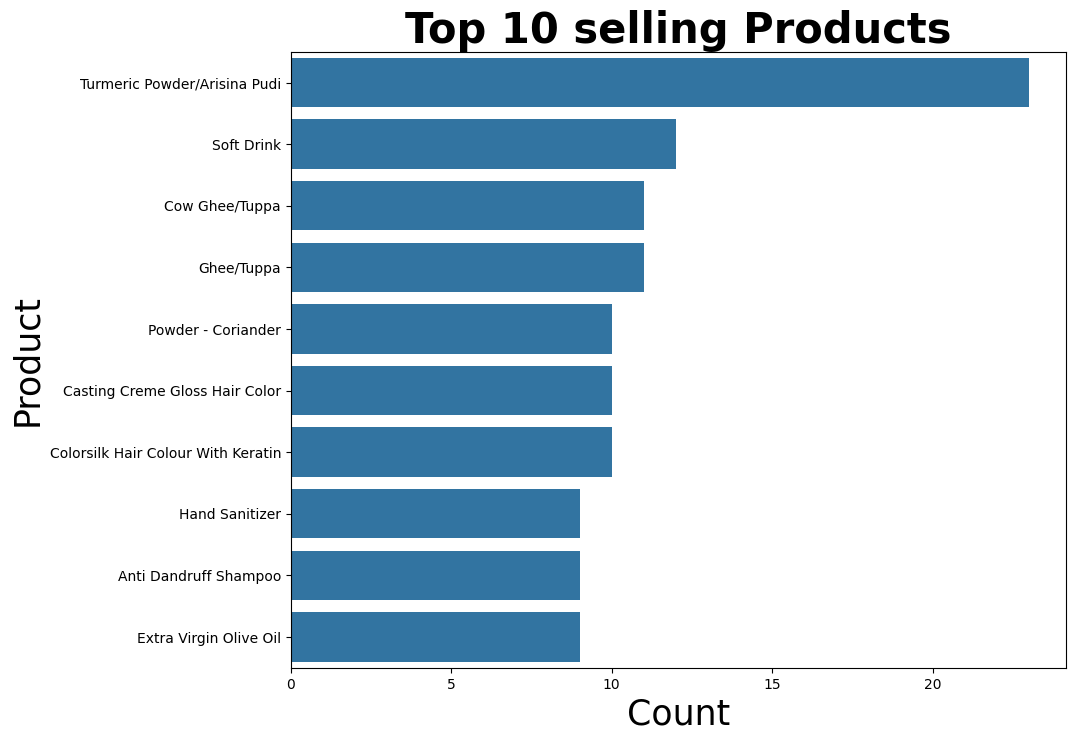

In [ ]:
#Top 10 selling Products
data = prod_data['product'].value_counts()[:10]
plt.figure(figsize=(10,8))
sns.barplot(x=data,y=data.index)
plt.xlabel('Count',fontdict={'fontsize': 25})
plt.ylabel('Product',fontdict={'fontsize': 25})
plt.title('Top 10 selling Products',fontweight="bold",fontdict={'fontsize': 30})
plt.rcParams['font.size'] = 10

ANALYSIS OF SALES PRICE

In [ ]:
print(Back.YELLOW+ Style.BRIGHT+ 'Analysis of Sale Price:' + Style.RESET_ALL)
print('Minimum Sale Price : '+ Fore.RED+ Style.BRIGHT+ str(prod_data['sale_price'].min()) + Style.RESET_ALL)
print('Maximum Sale Price : '+ Fore.RED+ Style.BRIGHT+ str(prod_data['sale_price'].max()) + Style.RESET_ALL)
print('Mean Sale Price    : '+ Fore.RED+ Style.BRIGHT+ str(round(prod_data['sale_price'].mean(),2)) + Style.RESET_ALL)

Analysis of Sale Price:
Minimum Sale Price : 3.0
Maximum Sale Price : 6660.0
Mean Sale Price    : 267.68


In [ ]:
#Sale Price Range of the Products
range_val = [['1-10',1, 10], ['11-25', 11, 25], ['26-50', 26, 50],
              ['51-100',51, 100], ['101-150', 101, 150], ['151-200', 151, 200],
              ['201-300',201, 300], ['301-400', 301, 400], ['401-500', 401, 500],
              ['501-1000',501, 1000], ['1001-1500', 1001, 1500], ['1501-2000', 1501, 2000],
              ['2001-3000',2001, 3000], ['3001-5000', 3001, 5000], ['5001-10000', 5001, 10000],
              ['10001-15000',10001, 15000]]
range_df = pd.DataFrame(range_val, columns=['range_name', 'min_val', 'max_val'])

# range_df

range_df['prod_count']=''
for idx, row in range_df.iterrows():
    range_df.at[idx, 'prod_count'] = len(prod_data['product'][(prod_data['sale_price']>= row['min_val']) & (prod_data['sale_price']<= row['max_val'])])
# range_df

fig = go.Figure(data=px.bar(x=range_df.range_name,
                            y=range_df.prod_count,
                            color = range_df.range_name,
                            color_discrete_sequence=px.colors.sequential.Inferno,
                            title='<b>Sale Price Range of the Products</b>',
                            text = range_df.prod_count,
                            height=500))
fig.update_layout(
    font_family="Courier New",
    title_font_family="Courier New",
    title_font_color="red",
    title_font_size=20,
    xaxis_title="<b>Price Range</b>",
    yaxis_title="<b>No. of Products</b>",
    legend_title_font_color="green"
)
fig.show()

ANALYSIS OF DISCOUNTS

In [ ]:
print(Back.YELLOW+ Style.BRIGHT+ 'Product with Highest Discount:' + Style.RESET_ALL)
prod_data[['product','category','discount']][prod_data['discount']==prod_data['discount'].max()]

Product with Highest Discount:


,product,category,discount
17713,Fruit & Vegetables Hand Juicer,"Kitchen, Garden & Pets",82.506266


In [ ]:
#Top 20 Disounts
print(Back.YELLOW+ Style.BRIGHT+ 'Top 20 Disounts:' + Style.RESET_ALL)
prod_data[['product','category','discount']].sort_values('discount', ascending=False).head(20)

Top 20 Disounts:


,product,category,discount
17713,Fruit & Vegetables Hand Juicer,"Kitchen, Garden & Pets",82.506266
13318,Small Silicone Spatula With Plastic Handle - A...,"Kitchen, Garden & Pets",81.203008
13740,Decorative Party Light Big Star String LED Lig...,"Kitchen, Garden & Pets",80.982712
10438,NHS 860 Temperature Control Professional Hair ...,Beauty & Hygiene,80.499791
13265,Decorative Party Light Golden Bell String LED ...,"Kitchen, Garden & Pets",79.239620
11473,Decorative Party Light Golden Bell String LED ...,"Kitchen, Garden & Pets",79.239620
10092,USB String Fairy Lights 3M 30 LED For Decorati...,"Kitchen, Garden & Pets",78.696742
398,Steel Belly Shape Storage Dabba/ Container Set...,"Kitchen, Garden & Pets",77.989950
24292,Steel Belly Shape Storage Dabba/ Container Set...,"Kitchen, Garden & Pets",77.989950
9792,Decorative Party Light Pine String LED Light 7...,"Kitchen, Garden & Pets",77.477477


In [ ]:
#Category wise Average Discount Offered
catg_disc=prod_data[prod_data['discount']!=0].groupby('category').agg(avg_discount=('discount','mean')).reset_index()
catg_disc=catg_disc.sort_values('avg_discount', ascending=False)
catg_disc= catg_disc.round({"avg_discount":2})

# catg_disc

fig = go.Figure(data=px.bar(x=catg_disc.category,
                            y=catg_disc.avg_discount,
                            color = catg_disc.category,
                            color_discrete_sequence=px.colors.sequential.Viridis,
                            title='<b>Category wise Average Discount Offered</b>',
                            text = catg_disc.avg_discount,
                            height=500))
fig.update_layout(
    font_family="Courier New",
    title_font_family="Courier New",
    title_font_color="Red",
    title_font_size=20,
    xaxis_title="<b>Category</b>",
    yaxis_title="<b>Average Discount</b>",
    legend_title_font_color="green"
)
fig.show()

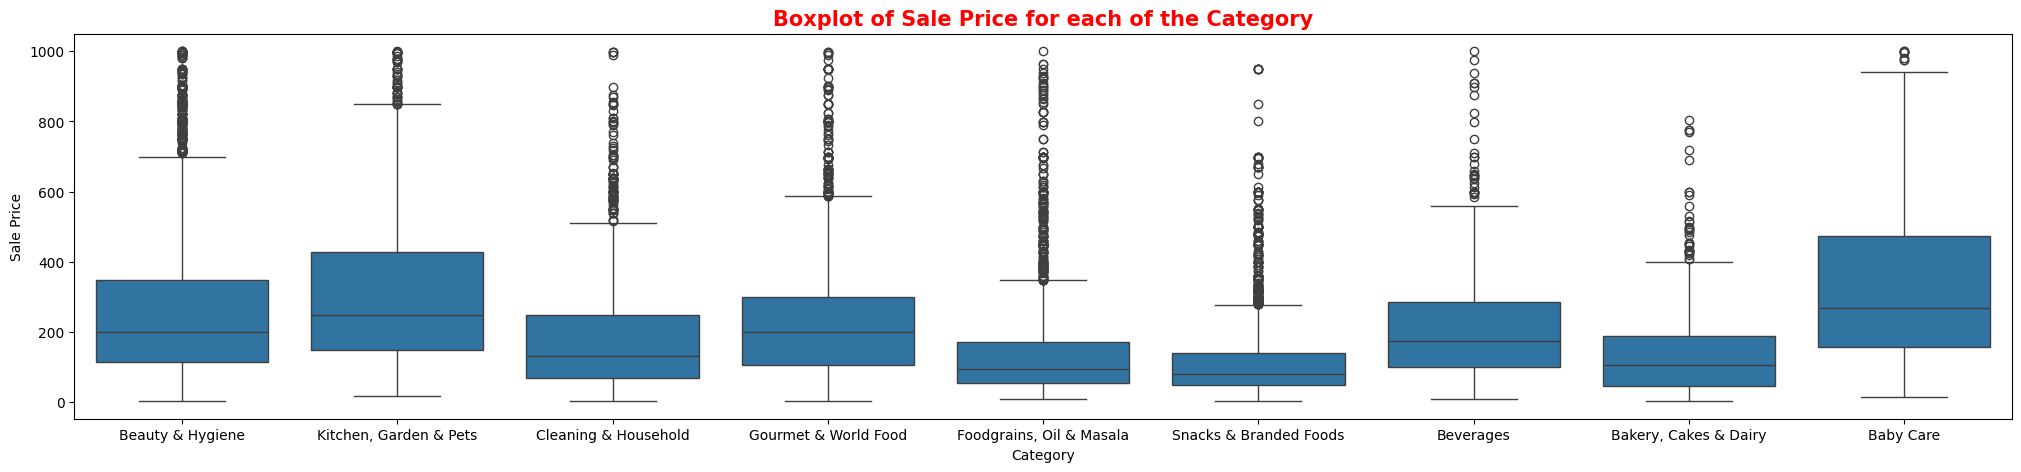

In [ ]:
#boxplot for distribution

f = plt.figure()
f.set_figwidth(25)
f.set_figheight(5)

box_df= prod_data[prod_data['sale_price']<=1000]

sns.boxplot(y=box_df['sale_price'], x=box_df['category'])
plt.title('Boxplot of Sale Price for each of the Category', fontsize=15, color='red', fontweight='bold')
plt.ylabel('Sale Price')
plt.xlabel('Category');

In [ ]:
#Brand Average Rating Details
rating_df=prod_data[prod_data['rating'].notnull()].groupby('brand').agg(rating_count=('rating', 'count'))\
      .reset_index().sort_values('rating_count', ascending=False)
rating_df= rating_df[rating_df['rating_count']>=50]

brand_avg_rating=prod_data[prod_data['brand'].isin(rating_df['brand'])].groupby(['brand'])\
    .agg(avg_rating=('rating', 'mean')).reset_index().sort_values('avg_rating', ascending=False)
brand_avg_rating= brand_avg_rating.round({"avg_rating":1})
brand_avg_rating=brand_avg_rating.sort_values('avg_rating', ascending=False)

# brand_avg_rating

print(Back.YELLOW+ Style.BRIGHT+ 'Brand Average Rating Details:' + Style.RESET_ALL)
brand_avg_rating['avg_rating'].describe()

Brand Average Rating Details:


count    61.000000
mean      3.970492
std       0.212402
min       3.400000
25%       3.800000
50%       4.000000
75%       4.100000
max       4.500000
Name: avg_rating, dtype: float64

In [ ]:
#Brands and their Rating
color_scheme=px.colors.sequential.Peach

fig = px.treemap(brand_avg_rating,
                 path=['avg_rating', 'brand'],
                 values='avg_rating',
                 title = '<b> Brands and their Rating</b>',
                 color_discrete_sequence=px.colors.sequential.Peach,
                 width=1000, height=500)
fig.update_layout(template = 'ggplot2')
fig.show()

In [ ]:
#Category wise BB & Non-BB Products Count
bb_brands = ['Fresho','bb Royal','BB Home','Fresho Signature','bb Combo','bb Popular',
             'BB Home Herbal','BB Royal Organic','bigbasket','Fresho Organic']
prod_data['is_bb_brand'] = prod_data.apply(lambda x: 'BigBasket' if x['brand'] in(bb_brands) else 'Non-BB', axis=1)
# prod_data

ctg_brand_split = prod_data[['product','category', 'is_bb_brand']].groupby(['category', 'is_bb_brand'])\
                  .agg(prod_count=('product', 'count')).reset_index()


ctg_brand_split['brand_count'] = ctg_brand_split.apply(lambda row: row['is_bb_brand']+ '-' + str(row['prod_count']), axis=1)

# ctg_brand_split


fig=px.sunburst(data_frame=ctg_brand_split, path=['category','brand_count'], width=1000, height=700)
fig.update_layout(title_text="<b>Category wise BB & Non-BB Products Count </b>",
                  title_font_family="Times New Roman",
                  title_font_color="red",
                  title_font_size=20)
fig.show()

**DEMOGRAPHIC FILTER RECOMMENDATION8**

Demographic Filtering is like recommeding items based on a feature. Like the top 10 rated items or the top 10 items in a particular category.

In [ ]:

#define
def sort_recommendor(col='rating',sort_type = False):
    """
    A recommendor based on sorting products on the column passed.
    Arguments to be passed:

    col: The Feature to be used for recommendation.
    sort_type: True for Ascending Order
    """
    rated_recommend = prod_data.copy()
    if rated_recommend[col].dtype == 'O':
        col='rating'
    rated_recommend = rated_recommend.sort_values(by=col,ascending = sort_type)
    return rated_recommend[['product','brand','sale_price','rating']].head(10)

In [ ]:
help(sort_recommendor)

Help on function sort_recommendor in module __main__:

sort_recommendor(col='rating', sort_type=False)
    A recommendor based on sorting products on the column passed.
    Arguments to be passed:
    
    col: The Feature to be used for recommendation.
    sort_type: True for Ascending Order



In [ ]:
sort_recommendor(col='sale_price',sort_type=True)

,product,brand,sale_price,rating
21312,Serum,Livon,3.0,2.5
18290,Sugar Coated Chocolate,Cadbury Gems,5.0,4.2
21228,Dish Shine Bar,Exo,5.0,4.2
14538,Cadbury Perk - Chocolate Bar,Cadbury,5.0,4.2
19538,Layer Cake - Chocolate,Winkies,5.0,4.2
2978,Sugar Free Chewing Gum - Mixed Fruit,Orbit,5.0,4.2
15926,Dreams Cup Cake - Choco,Elite,5.0,3.9
6014,Good Day Butter Cookies,Britannia,5.0,4.1
27413,Layer Cake - Orange,Winkies,5.0,4.1
11306,Happy Happy Choco-Chip Cookies,Parle,5.0,4.2


OBSERVATION: Notice that our top product has rating of 2.5 which is quite bad so let's filter down by setting a threshold rating

In [ ]:
C= prod_data['rating'].mean()
C

3.9430626326963902

In [ ]:
#define
def sort_recommendor(col='rating',sort_type = False):
    """
    A recommendor based on sorting products on the column passed.
    Arguments to be passed:

    col: The Feature to be used for recommendation.
    sort_type: True for Ascending Order
    """
    rated_recommend = prod_data.copy().loc[prod_data['rating'] >= 3.5]
    if rated_recommend[col].dtype == 'O':
        col='rating'
    rated_recommend = rated_recommend.sort_values(by=col,ascending = sort_type)
    return rated_recommend[['product','brand','sale_price','rating']].head(10)

In [ ]:
sort_recommendor(col='sale_price',sort_type=True)

,product,brand,sale_price,rating
2761,Orbit Sugar-Free Chewing Gum - Lemon & Lime,Wrigleys,5.0,4.2
3445,Marie Light Biscuits - Active,Sunfeast,5.0,4.5
14603,50-50 Timepass Biscuits,Britannia,5.0,3.9
17640,Hand Wash - Moisture Shield,Savlon,5.0,4.4
27490,50-50 Timepass Salted Biscuits,Britannia,5.0,4.2
26584,Polo - The Mint With The Hole,Nestle,5.0,4.4
2978,Sugar Free Chewing Gum - Mixed Fruit,Orbit,5.0,4.2
19538,Layer Cake - Chocolate,Winkies,5.0,4.2
19202,Bounce Biscuits - Choco Creme,Sunfeast,5.0,4.2
14538,Cadbury Perk - Chocolate Bar,Cadbury,5.0,4.2


**Content Based Recommendor**

In [ ]:
#Text Handling Libraries
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(prod_data['description'])
tfidf_matrix.shape

(18840, 23342)

Now to compute the similarity score, let's use Linear_Kernel. Linear Kernel which Calculates the Dot Product of the tfidf_matrix and returns an aggreate value depicting the Similarity score.

[ ]


In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.01632718, 0.00999603, ..., 0.01056047, 0.01133156,
        0.        ],
       [0.01632718, 1.        , 0.00719713, ..., 0.        , 0.        ,
        0.        ],
       [0.00999603, 0.00719713, 1.        , ..., 0.00635776, 0.        ,
        0.        ],
       ...,
       [0.01056047, 0.        , 0.00635776, ..., 1.        , 0.        ,
        0.        ],
       [0.01133156, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
indices = pd.Series(prod_data.index, index=prod_data['product']).drop_duplicates()

def get_recommendations_1(title, cosine_sim=cosine_sim):

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return prod_data['product'].iloc[movie_indices]

get_recommendations_1('Water Bottle - Orange')

11320    Rectangular Plastic Container - With Lid, Mult...
11642                               Jar - With Lid, Yellow
26451     Round & Flat Storage Container - With lid, Green
6163     Premium Rectangular Plastic Container With Lid...
9546     Premium Round Plastic Container With Lid - Yellow
13959    Premium Rectangular Plastic Container With Lid...
19381    Premium Round & Flat Storage Container With Li...
24255      Premium Round Plastic Container With Lid - Blue
26067    Premium Round Plastic Container With Lid - Mul...
26074      Premium Round Plastic Container With Lid - Pink
Name: product, dtype: object

In [ ]:
get_recommendations_1('Cadbury Perk - Chocolate Bar')

17385                                Cashew Nuts - Salted
23126                        Nutrione - Baked Cashew Nuts
11962    Signature Roasted & Salted Cashew/Godambi - W240
23600                                             Cashews
11947                               Sunflower Seeds - Raw
8765                                     Chilli Nut Chaat
1986                         Whole Cashew/Godambi - Jumbo
2907                                      Cashew - Salted
21538            Salted Party Mix - Premium International
25887                               Broken Cashew/Godambi
Name: product, dtype: object

In [ ]:
prod_data1 = prod_data.copy()
prod_data1.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,discount,is_bb_brand
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,0.000000,Non-BB
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",0.000000,Non-BB
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",52.400000,Non-BB
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,15.340909,Non-BB
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,0.000000,Non-BB


Notice that a product can be in multiple catergories and sub_categories and they are separated with a &. Let's split them into a list for futher processes.

In [ ]:
rmv_spc = lambda a:a.strip()
get_list = lambda a:list(map(rmv_spc,re.split('& |, |\*|\n', a)))

get_list('A & B, C')


for col in ['category', 'sub_category', 'type']:
    prod_data1[col] = prod_data1[col].apply(get_list)


In [ ]:
prod_data1.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,discount,is_bb_brand
0,1,Garlic Oil - Vegetarian Capsule 500 mg,"[Beauty, Hygiene]",[Hair Care],Sri Sri Ayurveda,220.0,220.0,"[Hair Oil, Serum]",4.1,This Product contains Garlic Oil that is known...,0.000000,Non-BB
1,2,Water Bottle - Orange,"[Kitchen, Garden, Pets]","[Storage, Accessories]",Mastercook,180.0,180.0,"[Water, Fridge Bottles]",2.3,"Each product is microwave safe (without lid), ...",0.000000,Non-BB
2,3,"Brass Angle Deep - Plain, No.2","[Cleaning, Household]",[Pooja Needs],Trm,119.0,250.0,"[Lamp, Lamp Oil]",3.4,"A perfect gift for all occasions, be it your m...",52.400000,Non-BB
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,"[Cleaning, Household]","[Bins, Bathroom Ware]",Nakoda,149.0,176.0,"[Laundry, Storage Baskets]",3.7,Multipurpose container with an attractive desi...,15.340909,Non-BB
4,5,Creme Soft Soap - For Hands & Body,"[Beauty, Hygiene]","[Bath, Hand Wash]",Nivea,162.0,162.0,"[Bathing Bars, Soaps]",4.4,Nivea Creme Soft Soap gives your skin the best...,0.000000,Non-BB


To avoid duplicacy, we will be converting everything to lowercase and also removing spaces between words. This will ensure that our recommendor doesn't consider Chocolate of Cholocate IceCream and Chocolate Bar as the same

In [ ]:
def cleaner(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

for col in ['category', 'sub_category', 'type','brand']:
    prod_data1[col] = prod_data1[col].apply(cleaner)

def couple(x):
    return ' '.join(x['category']) + ' ' + ' '.join(x['sub_category']) + ' '+x['brand']+' ' +' '.join( x['type'])
prod_data1['soup'] = prod_data1.apply(couple, axis=1)

prod_data1['soup'].head()

0    beauty hygiene haircare srisriayurveda hairoil...
1    kitchen garden pets storage accessories master...
2       cleaning household poojaneeds trm lamp lampoil
3    cleaning household bins bathroomware nakoda la...
4    beauty hygiene bath handwash nivea bathingbars...
Name: soup, dtype: object

In [ ]:
prod_data1.to_csv('data_cleaned_1.csv')

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(prod_data1['soup'])


cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
cosine_sim2

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.27216553],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.27216553, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

COSINE SIMILARITY DOCUMENTATION

In [ ]:
def get_recommendations_2(title, cosine_sim=cosine_sim):
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]

    return prod_data['product'].iloc[movie_indices]

In [ ]:
old_rec = get_recommendations_1('Cadbury Perk - Chocolate Bar').values
new_rec = get_recommendations_2('Cadbury Perk - Chocolate Bar', cosine_sim2).values

pd.DataFrame({'Old Recommendor': old_rec,'New Recommendor':new_rec})

,Old Recommendor,New Recommendor
0,Cashew Nuts - Salted,Bhujia Sev
1,Nutrione - Baked Cashew Nuts,Namkeen - Bhujia Sev
2,Signature Roasted & Salted Cashew/Godambi - W240,Namkeen - Chatpata Dal
3,Cashews,Moorkulu
4,Sunflower Seeds - Raw,Namkeen - Masala Peanut
5,Chilli Nut Chaat,Soya Sticks
6,Whole Cashew/Godambi - Jumbo,Namkeen - Tasty Nuts
7,Cashew - Salted,Mixture - Cornflakes
8,Salted Party Mix - Premium International,Namkeen - Aloo Bhujia
9,Broken Cashew/Godambi,Namkeen - Bhujia Sev


In [ ]:
#water bottle
old_rec = get_recommendations_1('Water Bottle - Orange').values
new_rec = get_recommendations_2('Water Bottle - Orange', cosine_sim2).values

pd.DataFrame({'Old Recommendor': old_rec,'New Recommendor':new_rec})

,Old Recommendor,New Recommendor
0,"Rectangular Plastic Container - With Lid, Mult...",Glass Water Bottle - Aquaria Organic Purple
1,"Jar - With Lid, Yellow",Glass Water Bottle With Round Base - Transpare...
2,"Round & Flat Storage Container - With lid, Green",H2O Unbreakable Water Bottle - Pink
3,Premium Rectangular Plastic Container With Lid...,Water Bottle H2O Purple
4,Premium Round Plastic Container With Lid - Yellow,H2O Unbreakable Water Bottle - Green
5,Premium Rectangular Plastic Container With Lid...,Regel Tritan Plastic Sports Water Bottle - Black
6,Premium Round & Flat Storage Container With Li...,Apsara 1 Water Bottle - Assorted Colour
7,Premium Round Plastic Container With Lid - Blue,"Glass Water Bottle With Round Base - Yellow, B..."
8,Premium Round Plastic Container With Lid - Mul...,Trendy Stainless Steel Bottle With Steel Cap -...
9,Premium Round Plastic Container With Lid - Pink,"Penta Plastic Pet Water Bottle - Violet, Wide ..."


In [ ]:
prod_data.isnull().sum()

index           0
product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
discount        0
is_bb_brand     0
dtype: int64

<Axes: xlabel='sale_price', ylabel='Count'>

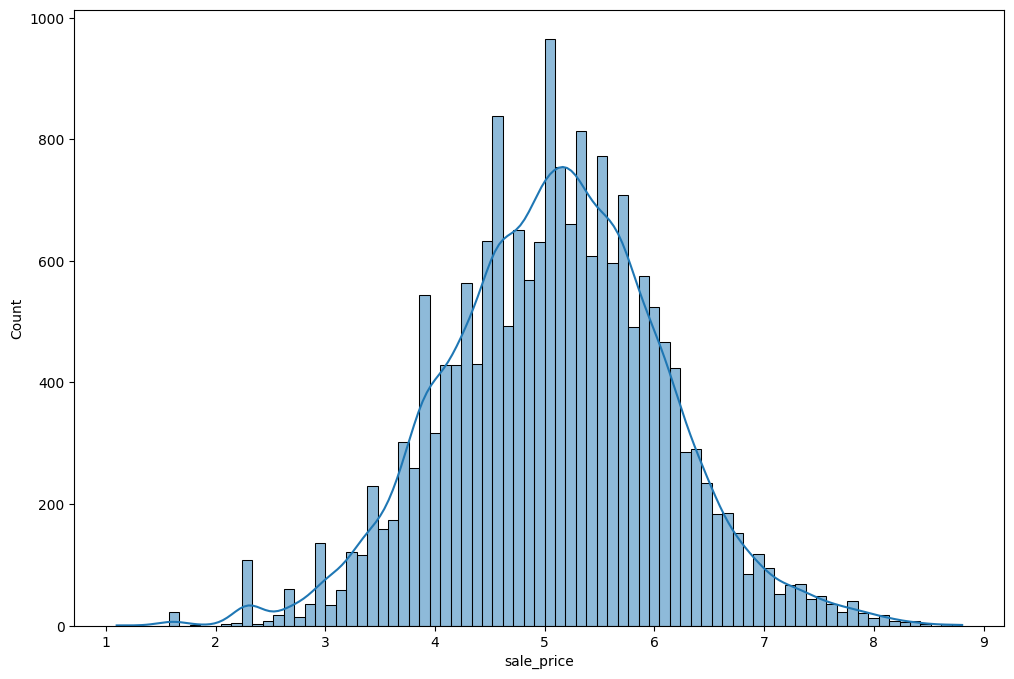

In [ ]:
a = np.log(prod_data.sale_price)
prod_data["a"] = a

prod_data.drop(["description","a"],axis = 1,inplace=True)

logSale = np.log(prod_data.sale_price)

prod_data.sale_price = logSale

plt.figure(figsize=(12,8))
sns.histplot(data=prod_data,x = "sale_price",palette = "rocket",kde=True)

In [ ]:
print("Median: ",prod_data.rating.median(),"\nMode: ",prod_data.rating.mode()[0],"\nMean : ",prod_data.rating.mean())

Median:  4.1 
Mode:  4.2 
Mean :  3.9430626326963902


In [ ]:
prod_data["rating"].fillna(prod_data.rating.median(),inplace=True)

In [ ]:
prod_data["product"].count()


18840

In [ ]:

prod_data["product"].value_counts()

product
Turmeric Powder/Arisina Pudi                                                                   23
Soft Drink                                                                                     12
Cow Ghee/Tuppa                                                                                 11
Ghee/Tuppa                                                                                     11
Powder - Coriander                                                                             10
                                                                                               ..
Bio Sandalwood Lotion - 50 Spf Sunscreen For All Skin Types In The Sun Very Water Resistant     1
Tortoise Plate                                                                                  1
Moroccan Argan Oil Ultra Nourishing Body Lotion                                                 1
Ultimate Desire For Women                                                                       1
Green Tea - 

In [ ]:
prod_data["product"].value_counts()

a = prod_data["product"].value_counts().apply(lambda x : x == 1)

In [ ]:
count = 0
for i in a:
    if i == True:
        count += 1

count

14293

In [ ]:
prod_data.drop("product",axis = 1,inplace = True)

In [ ]:
prod_data.brand.value_counts()
prod_data.brand.value_counts().mean()

9.746508018623901

In [ ]:
prod_data.sale_price.value_counts()
prod_data.sale_price.median()

5.10594547390058

In [ ]:
prod_data.drop("brand",axis = 1,inplace = True)

In [ ]:
prod_data.head()

,index,category,sub_category,sale_price,market_price,type,rating,discount,is_bb_brand
0,1,Beauty & Hygiene,Hair Care,5.393628,220.0,Hair Oil & Serum,4.1,0.000000,Non-BB
1,2,"Kitchen, Garden & Pets",Storage & Accessories,5.192957,180.0,Water & Fridge Bottles,2.3,0.000000,Non-BB
2,3,Cleaning & Household,Pooja Needs,4.779123,250.0,Lamp & Lamp Oil,3.4,52.400000,Non-BB
3,4,Cleaning & Household,Bins & Bathroom Ware,5.003946,176.0,"Laundry, Storage Baskets",3.7,15.340909,Non-BB
4,5,Beauty & Hygiene,Bath & Hand Wash,5.087596,162.0,Bathing Bars & Soaps,4.4,0.000000,Non-BB


In [ ]:
prod_data.isnull().sum()

index           0
category        0
sub_category    0
sale_price      0
market_price    0
type            0
rating          0
discount        0
is_bb_brand     0
dtype: int64

In [ ]:
prod_data.type.value_counts()


type
Face Care                 1094
Men's Deodorants           404
Shampoo & Conditioner      390
Blended Masalas            343
Containers Sets            332
                          ... 
Health Supplements           1
Bagels & Baguette            1
Gift Wraps & Bags            1
Gourmet Tea & Tea Bags       1
Gourmet Popcorn              1
Name: count, Length: 358, dtype: int64

In [ ]:
prod_data.drop("type",axis = 1,inplace=True)

In [ ]:
prod_data.drop("is_bb_brand",axis = 1,inplace=True)

In [ ]:
prod_data = prod_data.drop(prod_data[prod_data["market_price"]>1200].index)

In [ ]:
prod_data.head()

,index,category,sub_category,sale_price,market_price,rating,discount
0,1,Beauty & Hygiene,Hair Care,5.393628,220.0,4.1,0.000000
1,2,"Kitchen, Garden & Pets",Storage & Accessories,5.192957,180.0,2.3,0.000000
2,3,Cleaning & Household,Pooja Needs,4.779123,250.0,3.4,52.400000
3,4,Cleaning & Household,Bins & Bathroom Ware,5.003946,176.0,3.7,15.340909
4,5,Beauty & Hygiene,Bath & Hand Wash,5.087596,162.0,4.4,0.000000


In [ ]:
prod_data.isnull().sum()

index           0
category        0
sub_category    0
sale_price      0
market_price    0
rating          0
discount        0
dtype: int64

In [ ]:
prod_data1 = prod_data.copy()
colums = prod_data.columns
prod_data1 = pd.get_dummies(prod_data1,columns=["category","sub_category"],drop_first=True)


In [ ]:
X = prod_data1.drop("sale_price",axis = 1)
y = prod_data1["sale_price"]
X

,index,market_price,rating,discount,"category_Bakery, Cakes & Dairy",category_Beauty & Hygiene,category_Beverages,category_Cleaning & Household,"category_Foodgrains, Oil & Masala",category_Gourmet & World Food,...,sub_category_Skin Care,sub_category_Snacks & Namkeen,"sub_category_Snacks, Dry Fruits, Nuts","sub_category_Spreads, Sauces, Ketchup",sub_category_Stationery,sub_category_Steel Utensils,sub_category_Storage & Accessories,sub_category_Tea,sub_category_Tinned & Processed Food,sub_category_Water
0,1,220.0,4.1,0.000000,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,180.0,2.3,0.000000,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,3,250.0,3.4,52.400000,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,176.0,3.7,15.340909,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,162.0,4.4,0.000000,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27550,27551,249.0,3.9,20.000000,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27551,27552,75.0,4.0,10.000000,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
27552,27553,200.0,3.8,0.000000,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
27553,27554,495.0,4.2,20.000000,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
column = X.columns
column

Index(['index', 'market_price', 'rating', 'discount',
       'category_Bakery, Cakes & Dairy', 'category_Beauty & Hygiene',
       'category_Beverages', 'category_Cleaning & Household',
       'category_Foodgrains, Oil & Masala', 'category_Gourmet & World Food',
       'category_Kitchen, Garden & Pets', 'category_Snacks & Branded Foods',
       'sub_category_Appliances & Electricals',
       'sub_category_Atta, Flours & Sooji', 'sub_category_Baby Accessories',
       'sub_category_Baby Bath & Hygiene', 'sub_category_Baby Food & Formula',
       'sub_category_Bakery Snacks', 'sub_category_Bakeware',
       'sub_category_Bath & Hand Wash', 'sub_category_Bins & Bathroom Ware',
       'sub_category_Biscuits & Cookies', 'sub_category_Breakfast Cereals',
       'sub_category_Cakes & Pastries', 'sub_category_Car & Shoe Care',
       'sub_category_Cereals & Breakfast',
       'sub_category_Chocolates & Biscuits',
       'sub_category_Chocolates & Candies', 'sub_category_Coffee',
       'sub_ca

In [ ]:
X.isnull().sum()

index                                   0
market_price                            0
rating                                  0
discount                                0
category_Bakery, Cakes & Dairy          0
                                       ..
sub_category_Steel Utensils             0
sub_category_Storage & Accessories      0
sub_category_Tea                        0
sub_category_Tinned & Processed Food    0
sub_category_Water                      0
Length: 88, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Now you can use MinMaxScaler
scaler = MinMaxScaler()


In [ ]:
X[column] = scaler.fit_transform(X[column])

In [ ]:
print(X[column])

          index  market_price  rating  discount  \
0      0.000000      0.181287   0.775  0.000000   
1      0.000036      0.147870   0.325  0.000000   
2      0.000073      0.206349   0.600  0.645296   
3      0.000109      0.144528   0.675  0.188920   
4      0.000145      0.132832   0.850  0.000000   
...         ...           ...     ...       ...   
27550  0.999855      0.205514   0.725  0.246296   
27551  0.999891      0.060150   0.750  0.123148   
27552  0.999927      0.164578   0.700  0.000000   
27553  0.999964      0.411028   0.800  0.246296   
27554  1.000000      0.323308   0.875  0.554072   

       category_Bakery, Cakes & Dairy  category_Beauty & Hygiene  \
0                                 0.0                        1.0   
1                                 0.0                        0.0   
2                                 0.0                        0.0   
3                                 0.0                        0.0   
4                                 0.0          

In [ ]:
X

,index,market_price,rating,discount,"category_Bakery, Cakes & Dairy",category_Beauty & Hygiene,category_Beverages,category_Cleaning & Household,"category_Foodgrains, Oil & Masala",category_Gourmet & World Food,...,sub_category_Skin Care,sub_category_Snacks & Namkeen,"sub_category_Snacks, Dry Fruits, Nuts","sub_category_Spreads, Sauces, Ketchup",sub_category_Stationery,sub_category_Steel Utensils,sub_category_Storage & Accessories,sub_category_Tea,sub_category_Tinned & Processed Food,sub_category_Water
0,0.000000,0.181287,0.775,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000036,0.147870,0.325,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.000073,0.206349,0.600,0.645296,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000109,0.144528,0.675,0.188920,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000145,0.132832,0.850,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27550,0.999855,0.205514,0.725,0.246296,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27551,0.999891,0.060150,0.750,0.123148,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27552,0.999927,0.164578,0.700,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27553,0.999964,0.411028,0.800,0.246296,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [ ]:
pip install CatBoost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.9 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn import ensemble
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor

In [ ]:
xgb = XGBRegressor(booster='gbtree', objective='reg:squarederror')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_lst = {
    "learning_rate" : [00.1,0.1,0.15,0.3,0.5],
    "n_estimators" : [100,500,1000,2000,3000],
    "max_depth" : [3,6,9],
    "min_child_weight" : [1,5,10,20],
    "reg_alpha" : [0.001,0.01,0.1],
    "reg_lambda" : [0.001,0.01,0.1]
}

In [ ]:
xgb_reg = RandomizedSearchCV(estimator=xgb,param_distributions=param_lst,
                            n_iter = 5,scoring="neg_root_mean_squared_error",cv = 5)

xgb_reg = xgb_reg.fit(X_train,y_train)

best_param = xgb_reg.best_params_

xgb = XGBRegressor(**best_param)

In [ ]:
def mean_cross_value(model,X,y):
    score = cross_val_score(model,X,y,cv=5)
    mean = score.mean()
    return mean

In [ ]:
xgb.fit(X_train,y_train)
preds = xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test,preds)
rmse_xgb = np.sqrt(mean_absolute_error(y_test,preds))
score_xgb = xgb.score(X_test,y_test)
cv_xgb = mean_cross_value(xgb,X,y)

In [ ]:
model_performances = pd.DataFrame({
    "Model":["XGBoost"],
    "CV(5)" : [str(cv_xgb)],
    "MAE" : [str(mae_xgb)],
    "RMSE" : [str(rmse_xgb)],
    "Score" : [str(score_xgb)]
})
model_performances

,Model,CV(5),MAE,RMSE,Score
0,XGBoost,0.9993209513794588,0.008180655196003245,0.09044697449889214,0.9994162601601013
